## DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING

#### This assignment aims to equip you with practical skills in data preprocessing, feature engineering, and feature selection techniques, which are crucial for building efficient machine learning models. You will work with a provided dataset to apply various techniques such as scaling, encoding, and feature selection methods including isolation forest and PPS score analysis.

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler,OneHotEncoder

In [126]:
df=pd.read_csv('adult_with_headers (1).csv')

In [127]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [128]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [129]:
df.shape

(32561, 15)

##### 1) Handle missing values as per the best practices (imputation, removal, etc.).

In [130]:
### checking missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [131]:
### There are no missing values so no need of imputation and deletion

In [132]:
df.duplicated().sum()

24

In [133]:
df.drop_duplicates(ignore_index=True,inplace=True)

In [134]:
df.duplicated().sum()

0

In [135]:
df.boxplot()

<Axes: >

In [136]:
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25) #It finds the value at the given percentile in the data. Q1=25%
    Q3=df[column].quantile(0.75) #Q3 = 75%
    IQR=Q3-Q1
    lower_extreme=Q1-1.5*IQR
    upper_extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

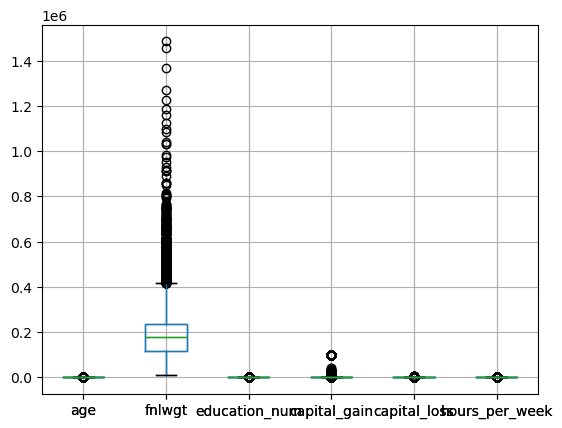

In [137]:
df.boxplot()
plt.show()

##### ● Apply scaling techniques to numerical features:
##### a) Standard Scaling
##### b) Min Max Scaling

In [138]:
df['education_num'].unique()

array([13. ,  9. ,  7. , 14. ,  5. , 10. , 12. , 11. ,  4.5, 16. , 15. ,
        6. ,  8. ])

In [139]:
scaling_std=['age','fnlwgt']
scaling_min_max=['education_num','hours_per_week','capital_gain','capital_loss']

In [140]:
std_sca=StandardScaler()
min_max_sca=MinMaxScaler()

In [141]:
df[scaling_std]=std_sca.fit_transform(df[scaling_std])

In [142]:
df[scaling_min_max]=min_max_sca.fit_transform(df[scaling_min_max])

In [143]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.032472,State-gov,-1.149209,Bachelors,0.739130,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,0.0,0.375,United-States,<=50K
1,0.844002,Self-emp-not-inc,-1.088284,Bachelors,0.739130,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,0.000,United-States,<=50K
2,-0.041304,Private,0.303007,HS-grad,0.391304,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,0.375,United-States,<=50K
3,1.065329,Private,0.503550,11th,0.217391,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,0.375,United-States,<=50K
4,-0.779058,Private,1.593665,Bachelors,0.739130,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,0.375,Cuba,<=50K


##### ●	Discuss the scenarios where each scaling technique is preferred and why.

Both scaling techniques are used for numerical data. Standard Scaling technique is used for standardization. It is to make the data in the range -3 to 3. Its formula is (xi-mean/std_dev). Min Max Scaling is used for normalization. It is make data in the range -1 to 1. Its formula is (xi-xmin)/(xmax-xmin). Standard scaling is preferred when the data is normally distributed and Min Max scaling is used when the data has strict boundaries.

### 2) Encoding Techniques:

##### ●	Apply One-Hot Encoding to categorical variables with less than 5 categories.

In [78]:
### Here sex column has only 2 categories, so we should use one hot encoding for this categoical variable

In [79]:
df['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [80]:
one_hot_enc=OneHotEncoder()

In [81]:
df_g=pd.DataFrame(one_hot_enc.fit_transform(df[['sex']]).toarray())

In [82]:
df_g.columns=['Female','Male']

In [83]:
df=pd.concat([df,df_g],axis=1)

In [84]:
df.drop(columns=['sex'],inplace=True)

In [85]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,Female,Male
0,0.032472,State-gov,-1.149209,Bachelors,0.739130,Never-married,Adm-clerical,Not-in-family,White,0.0,0.0,0.375,United-States,<=50K,0.0,1.0
1,0.844002,Self-emp-not-inc,-1.088284,Bachelors,0.739130,Married-civ-spouse,Exec-managerial,Husband,White,0.0,0.0,0.000,United-States,<=50K,0.0,1.0
2,-0.041304,Private,0.303007,HS-grad,0.391304,Divorced,Handlers-cleaners,Not-in-family,White,0.0,0.0,0.375,United-States,<=50K,0.0,1.0
3,1.065329,Private,0.503550,11th,0.217391,Married-civ-spouse,Handlers-cleaners,Husband,Black,0.0,0.0,0.375,United-States,<=50K,0.0,1.0
4,-0.779058,Private,1.593665,Bachelors,0.739130,Married-civ-spouse,Prof-specialty,Wife,Black,0.0,0.0,0.375,Cuba,<=50K,1.0,0.0


##### ●	Use Label Encoding for categorical variables. Data Exploration and Preprocessing:

In [86]:
#### Label Encoder is used if your target column is text and you have to convert it into numbers
#### Here the target value (income) is text and you have to convert it into numbers for classification

In [87]:
LE=LabelEncoder()

In [89]:
df['income']=LE.fit_transform(df['income'])
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,Female,Male
0,0.032472,State-gov,-1.149209,Bachelors,0.739130,Never-married,Adm-clerical,Not-in-family,White,0.0,0.0,0.375,United-States,0,0.0,1.0
1,0.844002,Self-emp-not-inc,-1.088284,Bachelors,0.739130,Married-civ-spouse,Exec-managerial,Husband,White,0.0,0.0,0.000,United-States,0,0.0,1.0
2,-0.041304,Private,0.303007,HS-grad,0.391304,Divorced,Handlers-cleaners,Not-in-family,White,0.0,0.0,0.375,United-States,0,0.0,1.0
3,1.065329,Private,0.503550,11th,0.217391,Married-civ-spouse,Handlers-cleaners,Husband,Black,0.0,0.0,0.375,United-States,0,0.0,1.0
4,-0.779058,Private,1.593665,Bachelors,0.739130,Married-civ-spouse,Prof-specialty,Wife,Black,0.0,0.0,0.375,Cuba,0,1.0,0.0


In [90]:
df['income'].unique()

array([0, 1])

##### ●	Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).

In [92]:
#### summary statistics

In [91]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,Female,Male
count,3.253700e+04,3.253700e+04,32537.000000,32537.0,32537.0,32537.000000,32537.000000,32537.000000,32537.000000
mean,1.489351e-16,5.568688e-18,0.489145,0.0,0.0,0.435162,0.240926,0.330762,0.669238
std,1.000015e+00,1.000015e+00,0.213864,0.0,0.0,0.309368,0.427652,0.470495,0.470495
min,-1.590589e+00,-1.835009e+00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,-7.790584e-01,-7.254036e-01,0.391304,0.0,0.0,0.375000,0.000000,0.000000,0.000000
50%,-1.150790e-01,-8.903763e-02,0.478261,0.0,0.0,0.375000,0.000000,0.000000,1.000000
75%,6.964512e-01,5.274370e-01,0.652174,0.0,0.0,0.625000,0.000000,1.000000,1.000000
max,2.909716e+00,2.406698e+00,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000


In [93]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
Female            0
Male              0
dtype: int64

In [94]:
df.dtypes

age               float64
workclass          object
fnlwgt            float64
education          object
education_num     float64
marital_status     object
occupation         object
relationship       object
race               object
capital_gain      float64
capital_loss      float64
hours_per_week    float64
native_country     object
income              int32
Female            float64
Male              float64
dtype: object

##### ●	Discuss the pros and cons of One-Hot Encoding and Label Encoding.

#### Pros of One-Hot Encoding
1) Good choice for Linear models
2) Good choice for Tree Models
#### Cons od One-Hot Encoding
1) N columns are created(N is the no of categories)
2) Nominal data(categories with no order)
3) High dimensionality(can lead to the curse of dimensionality)
#### Pros of Label Encoding
1) Single column of integers
2) Ordinal data(Categories with order)
3) Low dimensionality(memory efficient)
#### Cons of Label Encoding
1) Poor choice for Linear models
2) Mostly used for Target column

### 3) Feature Engineering:

##### ●	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.

In [96]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,Female,Male
0,0.032472,State-gov,-1.149209,Bachelors,0.739130,Never-married,Adm-clerical,Not-in-family,White,0.0,0.0,0.375,United-States,0,0.0,1.0
1,0.844002,Self-emp-not-inc,-1.088284,Bachelors,0.739130,Married-civ-spouse,Exec-managerial,Husband,White,0.0,0.0,0.000,United-States,0,0.0,1.0
2,-0.041304,Private,0.303007,HS-grad,0.391304,Divorced,Handlers-cleaners,Not-in-family,White,0.0,0.0,0.375,United-States,0,0.0,1.0
3,1.065329,Private,0.503550,11th,0.217391,Married-civ-spouse,Handlers-cleaners,Husband,Black,0.0,0.0,0.375,United-States,0,0.0,1.0
4,-0.779058,Private,1.593665,Bachelors,0.739130,Married-civ-spouse,Prof-specialty,Wife,Black,0.0,0.0,0.375,Cuba,0,1.0,0.0


In [99]:
df['capital_delta'] = df['capital_gain'] - df['capital_loss']

In [97]:
df['is_self_employed'] = df['workclass'].apply(lambda x: 1 if 'Self-emp' in x else 0)

In [100]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,Female,Male,is_self_employed,capital_delta
0,0.032472,State-gov,-1.149209,Bachelors,0.739130,Never-married,Adm-clerical,Not-in-family,White,0.0,0.0,0.375,United-States,0,0.0,1.0,0,0.0
1,0.844002,Self-emp-not-inc,-1.088284,Bachelors,0.739130,Married-civ-spouse,Exec-managerial,Husband,White,0.0,0.0,0.000,United-States,0,0.0,1.0,1,0.0
2,-0.041304,Private,0.303007,HS-grad,0.391304,Divorced,Handlers-cleaners,Not-in-family,White,0.0,0.0,0.375,United-States,0,0.0,1.0,0,0.0
3,1.065329,Private,0.503550,11th,0.217391,Married-civ-spouse,Handlers-cleaners,Husband,Black,0.0,0.0,0.375,United-States,0,0.0,1.0,0,0.0
4,-0.779058,Private,1.593665,Bachelors,0.739130,Married-civ-spouse,Prof-specialty,Wife,Black,0.0,0.0,0.375,Cuba,0,1.0,0.0,0,0.0


##### ●	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.

In [103]:
df['capital_gain_log'] = np.log1p(df['capital_gain'])

In [104]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,Female,Male,is_self_employed,capital_delta,capital_gain_log
0,0.032472,State-gov,-1.149209,Bachelors,0.739130,Never-married,Adm-clerical,Not-in-family,White,0.0,0.0,0.375,United-States,0,0.0,1.0,0,0.0,0.0
1,0.844002,Self-emp-not-inc,-1.088284,Bachelors,0.739130,Married-civ-spouse,Exec-managerial,Husband,White,0.0,0.0,0.000,United-States,0,0.0,1.0,1,0.0,0.0
2,-0.041304,Private,0.303007,HS-grad,0.391304,Divorced,Handlers-cleaners,Not-in-family,White,0.0,0.0,0.375,United-States,0,0.0,1.0,0,0.0,0.0
3,1.065329,Private,0.503550,11th,0.217391,Married-civ-spouse,Handlers-cleaners,Husband,Black,0.0,0.0,0.375,United-States,0,0.0,1.0,0,0.0,0.0
4,-0.779058,Private,1.593665,Bachelors,0.739130,Married-civ-spouse,Prof-specialty,Wife,Black,0.0,0.0,0.375,Cuba,0,1.0,0.0,0,0.0,0.0


In [ ]:
### Logh